In [8]:
% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
import plotly.plotly as py
import plotly as py_
import plotly
import plotly.graph_objs as go
import plotly
import seaborn as sns
import math
# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [49]:
data = pd.read_csv("sample.csv")

In [50]:
def over_veiw_of_the_data(data):
    # give a big pictur of the data without knowing the feature datatype and columns names and numbers
    columns = list(data.columns)
    col = 3
    row = math.ceil(len(columns)/3)
    fig = plt.figure(figsize=(20,15))
    for i, column in enumerate(columns):
        ax = fig.add_subplot(row, col, i + 1)
        ax.set_title(column)
        # categorical data
        if data.dtypes[column] == np.object:
            data[column].value_counts().plot(kind="bar", axes=ax)
        # continuous data
        else:
            data[column].hist(axes=ax)
            plt.xticks(rotation="vertical")
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
    
    
    #######The relationship between Three quantities and the label(categories)
    clusters = len(data["categorical"].unique())
    colors = []
    for i in range(clusters):
        color_str = 'rgb({0},{1},{2})'.format(randint(0,255),randint(0,255),randint(0,255))
        colors.append(color_str)

    data_3_cat = []
    for i in range(clusters):
        name = data['categorical'].unique()[i]
        color = colors[i]
        x = data[ data['categorical'] == name ]['quant1']
        y = data[ data['categorical'] == name ]['quant2']
        z = data[ data['categorical'] == name ]['quant3']

        trace = dict(
            name = name,
            x = x, y = y, z = z,
            type = "scatter3d",    
            mode = 'markers',
            marker = dict( size=3, color=color, line=dict(width=0) ) )
        data_3_cat.append( trace )

        cluster = dict(
            color = color,
            opacity = 0.3,
            type = "mesh3d",    
            x = x, y = y, z = z )
        data_3_cat.append( cluster )

    layout = dict(
        width=800,
        height=550,
        autosize=False,
        title='The relationship between Three quantities and the label',
        scene=dict(
            xaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            zaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            aspectratio = dict( x=1, y=1, z=0.7 ),
            aspectmode = 'manual'        
        ),
    )

    fig = dict(data=data_3_cat, layout=layout)
#   init_notebook_mode(connected=True)
    url = py_.offline.iplot(fig, filename='pandas-3d-scatter-relationship', validate=False)
    
    
    ########'Changes of Different Categories over the Timeline
    x = np.linspace(min(data["dates"]), max(data["dates"]), 20)
    data_strat = []
    for i in range(clusters):
        cluster = data['categorical'].unique()[i]
        num_list = []
        for j in range(len(x)):
            if i==0:
                min_x = min(data["dates"])
            else:
                min_x = x[i-1]
            dates = data[ data['categorical'] == cluster]["dates"]
            li1_ =dates[dates>=min_x]
            li2_ =dates[dates>=x[i]]
            li = [a and b for a, b in zip(li1_, li2_)]
            num = len( dates[li]) 
            num_list.append(num) 

        data_strat.append( go.Bar(
            x=pd.Series(x),
            y=pd.Series(num_list)
        ))



    layout = go.Layout(
        barmode='stack',
        title='Changes of different Categories over the Timeline'
    )

    fig = go.Figure(data=data_strat, layout=layout)

    url = py_.offline.iplot(data_strat, filename='pandas-bar-chart-layout')
    
    ##### points scatter around the world
    scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
        [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

    data_location = [ dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = data['longitude'],
            lat = data['latitude'],
            text = data['categorical'],
            mode = 'markers',
            marker = dict(
                size = 4,
                opacity = 0.8,
                reversescale = True,
                autocolorscale = False,
                symbol = 'points',
                line = dict(
                    width=1,
                    color='rgba(102, 102, 102)'
                ),
                colorscale = scl,
                cmin = 0,
                color = colors,
                cmax = 100,
                colorbar=dict(
                    title="points scatter"
                )
            ))]

    layout = dict(
            title = 'points scatter around the US',
            colorbar = False,
            geo = dict(
                scope='usa',
                showland = True,
                landcolor = "rgb(200, 250, 250)",
                subunitcolor = "rgb(217, 17, 217)",
                countrycolor = "rgb(27, 217, 217)",
                countrywidth = 0.5,
                subunitwidth = 0.5
            ),
        )

    fig = dict( data=data_location, layout=layout )
    py_.offline.iplot( fig, validate=False, filename='d3-airports' )

    

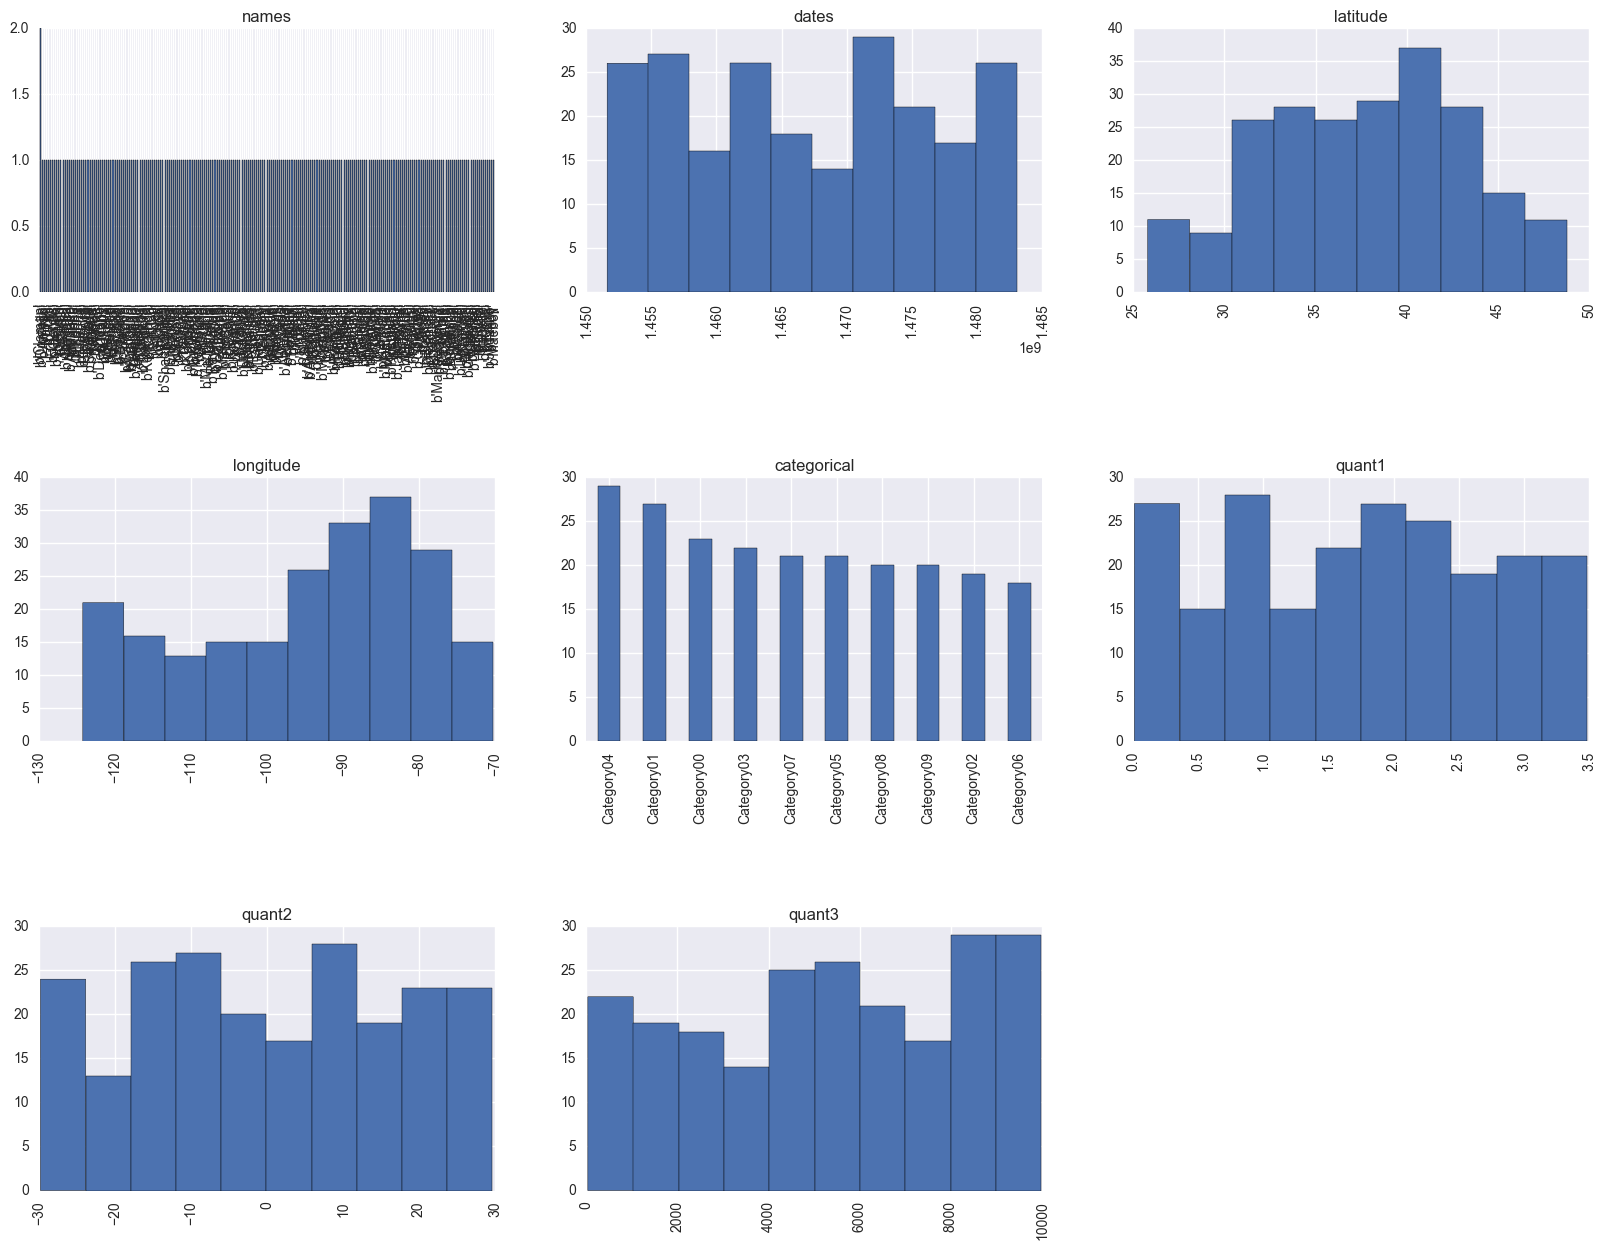

In [52]:
# choose 20% data set from the original dataset
# over_veiw_of_the_data(data.sample(data.shape[0]*0.2))
over_veiw_of_the_data(data)